# larnd_sim Light Simulations: 

## Before starting:
### This tutorial aims to familiarize users with the structure of light simulation output from larnd_sim. It uses files from MiniRun3, located [here](https://portal.nersc.gov/project/dune/data/2x2/simulation/productions/MiniRun3_1E19_RHC/MiniRun3_1E19_RHC.larnd_v2/LARNDSIM/). 
### Please download the first file, titled MiniRun3_1E19_RHC.larnd_v2.00000.LARNDSIM.h5 (1.3G) to replicate the plots in this tutorial.


In [1]:
## STANDARD IMPORTS
import uproot, h5py
import numpy as np
import pandas as pd

## 3D PLOTTING
import matplotlib as mpl
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.art3d as art3d
import matplotlib.gridspec as gridspec
from matplotlib import cm, colors
import matplotlib.patches as mpatches

In [2]:
## LOAD THE SIMULATION FILE

fname = 'MiniRun3_1E19_RHC.larnd_v2.00000.LARNDSIM.h5'
h5 = h5py.File(fname,'r')

## First, we look at the available branches:

In [3]:
## INSPECT FILE STRUCTURE

print('\n-------------------File Contents--------------------')
print('File Name: '+str(fname)+'\n')
print(f'Available branches: {[t for t in h5.keys()]}')
print('\n')


-------------------File Contents--------------------
File Name: MiniRun3_1E19_RHC.larnd_v2.00000.LARNDSIM.h5

Available branches: ['_header', 'configs', 'genie_hdr', 'genie_stack', 'light_dat', 'light_trig', 'light_wvfm', 'mc_packets_assn', 'messages', 'packets', 'tracks', 'trajectories', 'vertices']




## _header and configs store file ID information and constants used in the simulation:

In [4]:
header = h5['_header']
print(f'Stored Values in _header:\n')
for key, val in header.attrs.items():
    print(f'    %s: %s \n' % (key, val))
    
configs = h5['configs']
print(f'Stored Values in configs:\n')
for key, val in configs.attrs.items():
    print(f'    %s: %s \n' % (key, val))
    
print(f'Available keys in configs: {[t for t in configs.dtype.names]}')
print('\n')

Stored Values in _header:

    created: 1683335720.7198143 

    modified: 1683336130.2974105 

    version: 2.4 

Stored Values in configs:

    drift_length: 30.27225 

    lifetime: 2200.0 

    long_diff: 4e-06 

    pixel_layout: larnd-sim/larndsim/pixel_layouts/multi_tile_layout-2.3.16.yaml 

    tran_diff: 8.8e-06 

    vdrift: 0.1596452482154287 

Available keys in configs: ['timestamp', 'io_group', 'io_channel', 'chip_id', 'registers']




## Two branches provide GENIE backtracking:

In [5]:
genie_hdr = h5['genie_hdr']
print(f'Available keys in genie_hdr: {[t for t in genie_hdr.dtype.names]}')
print('\n')

genie_stack = h5['genie_stack']
print(f'Available keys in genie_stack: {[t for t in genie_stack.dtype.names]}')
print('\n')

Available keys in genie_hdr: ['eventID', 'vertexID', 'vertex', 'target', 'isCC', 'isQES', 'isMEC', 'isRES', 'isDIS', 'isCOH', 'Enu', 'nu_4mom', 'nu_pdg', 'Elep', 'lep_mom', 'lep_ang', 'lep_pdg', 'q0', 'q3', 'Q2', 'x', 'y']


Available keys in genie_stack: ['eventID', 'vertexID', 'trackID', 'part_4mom', 'part_pdg', 'part_status']




## Six branches provide charge output, but I focus on three:

### mc_packets_assn: 
    This branch contains truth information linking the packets branch to the tracks branch.
### packets: 
    This is the dataset that most resembles actual charge data (i.e., it contains the least truth information).
### tracks: 
    This dataset is necesarry for track reconstruction and backtracking.

In [6]:
mc_assn = h5['mc_packets_assn']
print(f'Available keys in mc_packets_assn: {[t for t in mc_assn.dtype.names]}')
print('\n')

messages = h5['messages']
print(f'Available keys in messages: {[t for t in messages.dtype.names]}')
print('\n')

packets = h5['packets']
print(f'Available keys in packets: {[t for t in packets.dtype.names]}')
print('\n')

tracks = h5['tracks']
print(f'Available keys in tracks: {[t for t in tracks.dtype.names]}')
print('\n')

traject = h5['trajectories']
print(f'Available keys in trajectories: {[t for t in traject.dtype.names]}')
print('\n')

vertices = h5['vertices']
print(f'Available keys in vertices: {[t for t in vertices.dtype.names]}')
print('\n')

Available keys in mc_packets_assn: ['track_ids', 'fraction']


Available keys in messages: ['message', 'timestamp', 'index']


Available keys in packets: ['io_group', 'io_channel', 'chip_id', 'packet_type', 'downstream_marker', 'parity', 'valid_parity', 'channel_id', 'timestamp', 'dataword', 'trigger_type', 'local_fifo', 'shared_fifo', 'register_address', 'register_data', 'direction', 'local_fifo_events', 'shared_fifo_events', 'counter', 'fifo_diagnostics_enabled', 'first_packet', 'receipt_timestamp']


Available keys in tracks: ['eventID', 'vertexID', 'segment_id', 'z_end', 'trackID', 'tran_diff', 'z_start', 'x_end', 'y_end', 'n_electrons', 'pdgId', 'x_start', 'y_start', 't_start', 't0_start', 't0_end', 't0', 'dx', 'long_diff', 'pixel_plane', 't_end', 'dEdx', 'dE', 't', 'y', 'x', 'z', 'n_photons']


Available keys in trajectories: ['eventID', 'vertexID', 'trackID', 'local_trackID', 'parentID', 'E_start', 'pxyz_start', 'xyz_start', 't_start', 'E_end', 'pxyz_end', 'xyz_end', 't_end', 'p

## Three branches provide light simulation output: 

### light_dat:
    This contains truth information.
### light_trig:
    This lists the optical channel triggered and provides two timestamps. 
    ts_sync in this dataset and timestamp in packets can be used to group SiPM and charge pixel triggers into combined events.
### light_wvfm:
    This dataset contains the simulated light waveforms for each triggered SiPM (optical channel). Each waveform consists of 1000 samples, 0.01 μs apart. 

In [7]:
light_dat = h5['light_dat']
print(f'Available keys in light_dat: {[t for t in light_dat.dtype.names]}')
print('\n')

light_trig = h5['light_trig']
print(f'Available keys in light_trig: {[t for t in light_trig.dtype.names]}')
print('\n')

light_wvfm = h5['light_wvfm']
print(f'Stored Values in light_wvfm:\n')
for key, val in light_wvfm.attrs.items():
    print(f'    %s: %s \n' % (key, val))

print(f'Available keys in light_wvfm: NONE, it is a single nested dataset')
print('\n')

Available keys in light_dat: ['segment_id', 'n_photons_det', 't0_det']


Available keys in light_trig: ['op_channel', 'ts_s', 'ts_sync']


Stored Values in light_wvfm:

Available keys in light_wvfm: NONE, it is a single nested dataset




## Defining Common Values:

### Spill Period: 
    The simulation does not currently include cosmics, so light and charge are triggered by the simulated
    neutrino beam spills. Spills occur every 1.2e7 ticks, where 1 tick = 0.01 μs.
### Samples:
    Each waveform in MiniRun3 is comprised of 1000 samples, but the simulation is still in development. For
    now, it's better to define constants in general terms.
### Bit: 
    As in the the real module data output, light output can utilize up to 16 bits. The sampling time
    determined how many bits are actually used. All unutilized bits are set to one. 
    
    If the data requires 14 bits, the last two bits are set to 1. Thus, the smallest possible value that 
    can be sampled by the light simulation becomes (0^14)*(2^2) = 4, rather than (0^16) = 1. 
 

In [8]:
## DEFINE COMMON VALUES

SPILL_PERIOD = 1.2e7

SAMPLES = len(light_wvfm[0][0])

BIT = min(x for x in abs(light_wvfm[0][0]) if x != 0)

## Load relevant datasets:

### packet_type: 
    This dataset tags packet entries by trigger type. 0 = charge trigger. 7 = light trigger. I exclude entries
    with trigger types other than 0 or 7, because they can make mapping light to charge through timestamps 
    more difficult. 
### eventD and trackID:
    These datasets are necessary for reconstructing charge tracks in the detector volume. They can be linked to
    packets using mc_truth_assn. EventID can be artificially linked to the light simulation using ts_sync
    (currently, events are spills).
### op_channel:
    Each SiPM in the detector is assigned a value out of 384. This dataset maps waveforms to the detector's geometry. 
### io_group: 
    Each module has 2 TPCs, and each is assigned an io_group value. 
### io_channel: 
    Pixel channels within each io_group.

In [9]:
## LOAD NECESSARY DATASETS

pack_type = np.array(packets['packet_type'])
p_tstamp = np.array(packets['timestamp'])
l_tsync = np.array(light_trig['ts_sync'])
spillID = np.array(tracks['eventID'])
trackID = np.array(tracks['trackID'])
opt_chan = np.array(light_trig['op_channel'])
io_group = np.array(packets['io_group'])
io_channel = np.array(packets['io_channel'])

In [10]:
## INSPECT PACKET TYPES

print('There are '+str(len(l_tsync))+' light events\n')
      
df = pd.DataFrame(pack_type)
df1 = df.value_counts()
print('Packet Type\nof Charge Trigger:')
print('------------------')
print('trig.|     \ntype |count')
print('-----------')
print(df1)

There are 956 light events

Packet Type
of Charge Trigger:
------------------
trig.|     
type |count
-----------
0    149242
4      3368
7      1786
6       248
dtype: int64


## Timestamp Turnover: 
    To link light and charge, we divide ts_sync by the spill period. In a simulation without cosmics to trigger
    the detector outside of spills, this always works. 
    
    However, charge timestamps for packets only go up to 2136000190 (2^31 ticks), which is 179 spills
    counting from 0). These files contain more than 179 events. This must be accounted for when assigning the
    packet and light branches eventIDs.

In [11]:
## SEE THAT TIMESTAMP TURNOVER MUST BE ACCOUNTED FOR 
## WHEN LINKING DATA-LIKE AND TRUTH-LIKE BRANCHES

print(max(spillID))
print(max(p_tstamp)/SPILL_PERIOD)
print(max(l_tsync)/SPILL_PERIOD)

195
178.95697058333334
178.00001583333332


In [12]:
## PACKET TYPES 4 AND 6 CAN MESS UP THIS CORRECTION, SO EXCLUDE THEM

tstamp_trig0 = p_tstamp[pack_type==0]
tstamp_trig7 = p_tstamp[pack_type==7]

In [13]:
## IDENTIFY THE INDEX WHERE THE TURNOVER OCCURS

charge_cutoff = np.where(tstamp_trig0 > 1.999**31)[0][-1]
light_cutoff = np.where(tstamp_trig7 > 1.999**31)[0][-1]
wvfm_cutoff = np.where(l_tsync > 1.999**31)[0][-1]

In [14]:
## ADD 2^31 TO ALL TIMESTAMPS FOLLOWING THE TURNOVER

tstamp_real_trig0 = np.concatenate((tstamp_trig0[:(charge_cutoff+1)],((2**31)+tstamp_trig0[(charge_cutoff+1):])))
tstamp_real_trig7 = np.concatenate((tstamp_trig7[:(light_cutoff+1)],((2**31)+tstamp_trig7[(light_cutoff+1):])))
l_tsync_real = np.concatenate((l_tsync[:(wvfm_cutoff+1)],((2**31)+l_tsync[(wvfm_cutoff+1):])))

In [15]:
## DEFINE SPILLID (EVENTID) FOR PACKETS AND LIGHT

light_spillIDs = (np.rint(l_tsync_real/SPILL_PERIOD)).astype(int)
packet0_spillIDs = (np.rint(tstamp_real_trig0/SPILL_PERIOD)).astype(int)
packet7_spillIDs = (np.rint(tstamp_real_trig7/SPILL_PERIOD)).astype(int)

list_spillIDs = np.unique(light_spillIDs)

## Check:
    Plotting eventID vs. their index in the dataset is a good check to make sure this works:

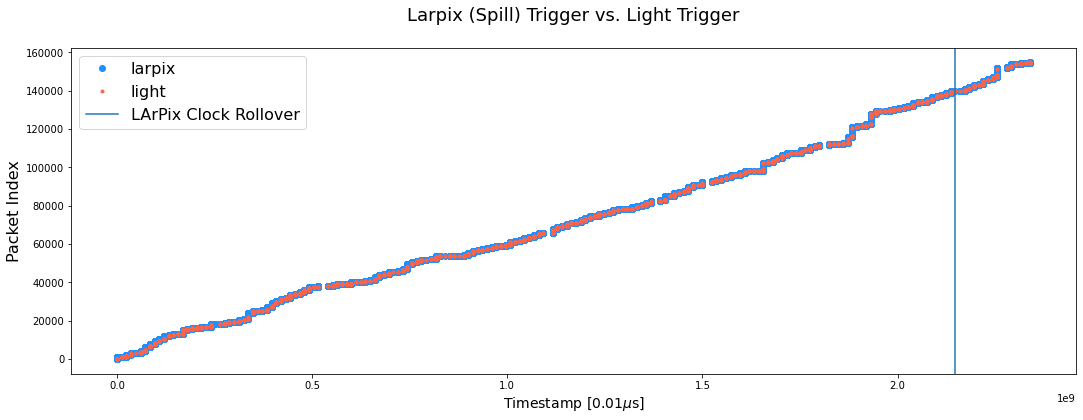

In [16]:
fig = plt.figure(figsize=(18,6))

indices = np.arange(0,len(p_tstamp),1)
indices_0 = indices[pack_type==0]
indices_7 = indices[pack_type==7]

plt.plot(tstamp_real_trig0,indices_0, "o", color='dodgerblue', label='larpix')
plt.plot(tstamp_real_trig7,indices_7,".", color='tomato', label='light')
plt.axvline(x=(2**31), label='LArPix Clock Rollover')

plt.title('Larpix (Spill) Trigger vs. Light Trigger\n', fontsize=18)
plt.xlabel(r'Timestamp [0.01$\mu$s]', fontsize=14)
plt.ylabel('Packet Index', fontsize=16)
#plt.xlim(175, 195)
plt.legend(fontsize=16)
plt.show()

## Inspecting Light Readout
    For every light simulation trigger, there should be two Pacman triggers of packet_type = 7. Also, an event
    triggering light readout in one TPC should trigger readout in the entire module. Thus, every event/spill 
    should have 8 light triggers and 16 packet_type = 7 triggers. Expect to see these features change in later
    runs. 

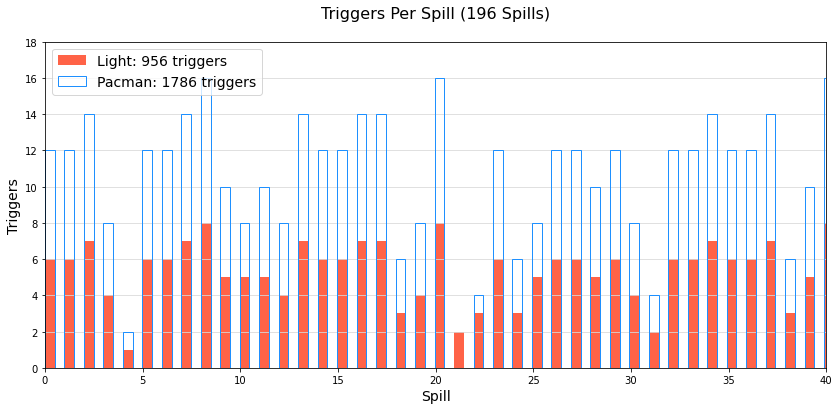

In [17]:
## TRIGGERS IN LIGHT AND CHARGE PER SPILL

fig = plt.figure(figsize=(14,6))

bins = np.linspace(min(packet7_spillIDs),max(packet7_spillIDs),392)
bin_width = bins[2] - bins[1]

counts, bins = np.histogram(np.array(light_spillIDs), bins=bins)
plt.hist(bins[:-1], bins, weights=counts, color='tomato', label='Light: '+str(len(l_tsync))+' triggers')

counts, bins = np.histogram(np.array(packet7_spillIDs), bins=bins)
plt.hist(bins[:-1], bins, weights=counts, histtype="step", color='dodgerblue', label='Pacman: '+str(len(packet7_spillIDs))+' triggers')

plt.title('Triggers Per Spill ('+str(len(list_spillIDs))+' Spills)\n', fontsize=16)
plt.xlabel('Spill', fontsize=14)
plt.ylabel('Triggers', fontsize=14)
plt.ylim(0,max(counts)+2)
plt.xlim(0,40)
plt.grid(axis='y', color='0.85')
plt.legend(loc='upper left', fontsize=14)
plt.show()

## Looking at Waveforms:
### light_wvfm: 
    The light_wvfm dataset has 3 axes: 
    1. axis = 0 gives the number of light triggers
    2. axis = 1 each trigger is a module, with 96 optical channels (SiPMs)
    3. axis = 2 each channel outputs a waveform made from 1000 samples
    
### geometry: 
    Modules in the simulation are numbered 1-4 (not 0-3) and their waveforms can be identified using the first
    optical channel in the associated op_channel dataset.
    
    Mod.1 channels = 0-95
    Mod.2 channels = 96-191
    Mod.3 channels = 192-287
    Mod.4 channels = 288-383
    
    Becuase not every module triggers for every event (for now), this needs to be checked case-by-case

In [18]:
## CHECK SHAPE AND MODULE

print(np.shape(light_wvfm))
print('opt_chan[0][0] = '+str(opt_chan[0][0])+': Ergo, light_wvfm[0] is readout from Module 1')

(956, 96, 1000)
opt_chan[0][0] = 0: Ergo, light_wvfm[0] is readout from Module 1


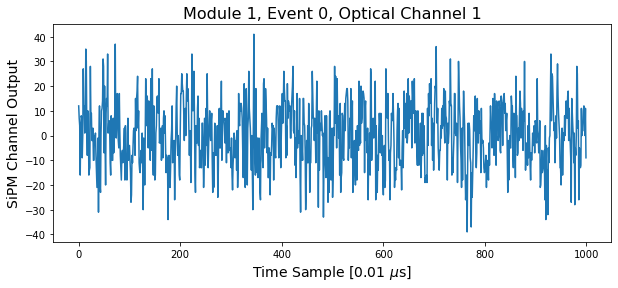

In [19]:
## PLOT SINGLE WAVEFORM

fig = plt.figure(figsize=(10,4))
plt.plot(np.linspace(0,SAMPLES-1,SAMPLES),light_wvfm[0][0]/BIT, label='Opt. Chan. 0')
plt.title('Module 1, Event '+str(light_spillIDs[0])+', Optical Channel 1', fontsize=16)
plt.xlabel(r'Time Sample [0.01 $\mu$s]', fontsize=14)
plt.ylabel('SiPM Channel Output', fontsize=14)
plt.show()

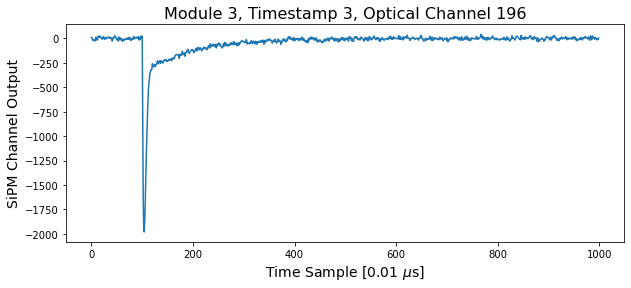

In [20]:
## A PEAK

fig = plt.figure(figsize=(10,4))
plt.plot(np.linspace(0,SAMPLES-1,SAMPLES),light_wvfm[19][0]/BIT, label='Opt. Chan. 0')
plt.title('Module 3, Timestamp '+str(light_spillIDs[19])+', Optical Channel 196', fontsize=16)
plt.xlabel(r'Time Sample [0.01 $\mu$s]', fontsize=14)
plt.ylabel('SiPM Channel Output', fontsize=14)
plt.show()

## Visualizing Light Alongside Charge
    If you're looking at a light simulation, odds are you're going to want to compare it to charge, or at least
    use light and charge positioning as a sanity check. This is computationally expensive (because of charge 
    backtracking), and I usually only run it for one spill at a time.

In [21]:
## SELECT A SPILL TO INSPECT

SPILL = 8

### "Sum Channels":
    To simplify the visual, I generally create "sum channels". In the modules, each Arclight or each set of 3
    adjacent LCMs form a sum channel of 6 SiPMs. I mimic that. 
    
### left and right:
    In this code, "left" and "right" are determined relative to the TPC drift direction. Note that the geometry
    is mirrored for TPCs in the same module. 

In [22]:
## ASSIGN "SUM CHANNEL" POSITIONS (this would be one side of one TPC)

SiPM_struct = np.array([0,0,0,0,0,0,
                        1,1,1,1,1,1,
                        2,2,2,2,2,2,
                        3,3,3,3,3,3])

## SELECT DATASETS BELONGING TO YOUR SPILL

spill_light = np.where(light_spillIDs == SPILL)[0]

## CREATE EMPTY DATASETS FOR EACH LIGHT ARRAY (one side of one TPC)

l_mod1_1L = np.zeros((24,SAMPLES))
l_mod1_1R = np.zeros((24,SAMPLES))
l_mod1_2L = np.zeros((24,SAMPLES))
l_mod1_2R = np.zeros((24,SAMPLES))

l_mod2_3L = np.zeros((24,SAMPLES))
l_mod2_3R = np.zeros((24,SAMPLES))
l_mod2_4L = np.zeros((24,SAMPLES))
l_mod2_4R = np.zeros((24,SAMPLES)) 

l_mod3_5L = np.zeros((24,SAMPLES))
l_mod3_5R = np.zeros((24,SAMPLES))
l_mod3_6L = np.zeros((24,SAMPLES))
l_mod3_6R = np.zeros((24,SAMPLES))

l_mod4_7L = np.zeros((24,SAMPLES))
l_mod4_7R = np.zeros((24,SAMPLES))
l_mod4_8L = np.zeros((24,SAMPLES))
l_mod4_8R = np.zeros((24,SAMPLES)) 

## SORT THE LIGHT DATA BY MODULE, TPC, and SIDE

for j in spill_light:

        if (opt_chan[j][0]) == 0: 
            l_mod1_1L = np.add(l_mod1_1L,light_wvfm[j][0:24])
            l_mod1_1R = np.add(l_mod1_1R,light_wvfm[j][24:48])
            l_mod1_2R = np.add(l_mod1_2R,light_wvfm[j][48:72])
            l_mod1_2L = np.add(l_mod1_2L,light_wvfm[j][72:96])

        if opt_chan[j][0]==96:
            l_mod2_3L = np.add(l_mod2_3L,light_wvfm[j][0:24])
            l_mod2_3R = np.add(l_mod2_3R,light_wvfm[j][24:48])
            l_mod2_4R = np.add(l_mod2_4R,light_wvfm[j][48:72])
            l_mod2_4L = np.add(l_mod2_4L,light_wvfm[j][72:96])

        if opt_chan[j][0]==192:
            l_mod3_5L = np.add(l_mod3_5L,np.array(light_wvfm[j][0:24]))
            l_mod3_5R = np.add(l_mod3_5R,np.array(light_wvfm[j][24:48]))
            l_mod3_6R = np.add(l_mod3_6R,np.array(light_wvfm[j][48:72]))
            l_mod3_6L = np.add(l_mod3_6L,np.array(light_wvfm[j][72:96])) 

        if opt_chan[j][0] == 288:
            l_mod4_7L = np.add(l_mod4_7L,np.array(light_wvfm[j][0:24]))
            l_mod4_7R = np.add(l_mod4_7R,np.array(light_wvfm[j][24:48]))
            l_mod4_8R = np.add(l_mod4_8R,np.array(light_wvfm[j][48:72]))
            l_mod4_8L = np.add(l_mod4_8L,np.array(light_wvfm[j][72:96])) 

## Comparing Light And Charge:
    The code below uses backtracking between the packets and tracks datasets to plot charge tracks in the
    volume alongside light waveform sums. It's a useful visual, but not a global check of light/charge 
    correlation.
    
    This code splits the detector into TPCs, pairing TPCs that align in the beam direction.

In [23]:
def data_readout(io_first, io_second, spill):
    
## SET UP AN 18-PLOT DISPLAY    
    fig = plt.figure(figsize=(13.8,8),tight_layout=True)
    subfigs = fig.subfigures(1, 6, wspace=0, width_ratios=[0.8,1.5,0.8,0.8,1.5,0.8], height_ratios=[1])
    axs0 = subfigs[0].subplots(4, 1,sharey=True,gridspec_kw={'hspace': 0})
    axs1 = subfigs[1].subplots(1, 1)
    axs2 = subfigs[2].subplots(4, 1,sharey=True,gridspec_kw={'hspace': 0})
    axs3 = subfigs[3].subplots(4, 1,sharey=True,gridspec_kw={'hspace': 0})
    axs4 = subfigs[4].subplots(1, 1)
    axs5 = subfigs[5].subplots(4, 1,sharey=True,gridspec_kw={'hspace': 0})

## CREATE AN EMPTY ARRAY TO AVOID RE-PLOTTING TRACKS
    plotted_tracks = []

## SET UP LABELING AND COLOR SCHEME
    titles = ["mod. 2, io_group 3","mod. 1, io_group 1","mod. 2, io_group 4","mod. 1, io_group 2",
              "mod. 4, io_group 7","mod. 3, io_group 5","mod. 4, io_group 8","mod. 3, io_group 6"]
    colors = ['aqua','aqua','lightgreen','lightgreen','yellow','yellow','orangered','orangered']
    cmap = cm.jet
    
## ENFORCE GEOMETRY
    ios = [3,1,4,2,7,5,8,6]
    left_data = [l_mod2_3L,l_mod1_1L,l_mod2_4L,l_mod1_2L,l_mod4_7L,l_mod3_5L,l_mod4_8L,l_mod3_6L]
    right_data = [l_mod2_3R,l_mod1_1R,l_mod2_4R,l_mod1_2R,l_mod4_7R,l_mod3_5R,l_mod4_8R,l_mod3_6R]

## ENSURE THE TIMESTAMP TURNOVER ISN'T AN ISSUE
    packet_list = packets[pack_type==0][packet0_spillIDs==spill]
    mc_assoc = mc_assn[pack_type==0][packet0_spillIDs==spill]

## MAP PACKETS TO TRACKS
    for ip,packet in enumerate(packet_list):
            track_ids = mc_assoc['track_ids'][ip]
            io_group = packet['io_group']

## GET THE POSITION OF CHARGE TRACKS AND SAVE TO THE CORRECT IO_GROUP
            for trackid in track_ids:
                if trackid >= 0 and trackid not in plotted_tracks:
                        plotted_tracks.append(trackid)
                        if io_group==io_first:
                            X = (tracks[trackid]['x_start']*10,tracks[trackid]['x_end']*10)
                            Y = (tracks[trackid]['y_start']*10,tracks[trackid]['y_end']*10)
                            Z = (tracks[trackid]['z_start']*10,tracks[trackid]['z_end']*10)
                            axs1.plot(Z,Y,c=colors[ios.index(io_first)],alpha=1,lw=1.5)
                        if io_group==io_second:
                            X = (tracks[trackid]['x_start']*10,tracks[trackid]['x_end']*10)
                            Y = (tracks[trackid]['y_start']*10,tracks[trackid]['y_end']*10)
                            Z = (tracks[trackid]['z_start']*10,tracks[trackid]['z_end']*10)
                            axs4.plot(Z,Y,c=colors[ios.index(io_second)],alpha=1,lw=1.5)
                        else:
                            axs1.plot(0,0,c='navy',alpha=0.1)
                            axs4.plot(0,0,c='navy',alpha=0.1)

## LABEL THE LIGHT PLOTS                            
    axs0[0].set_title("Left:\nio_group "+str(io_first))
    axs2[0].set_title("Right:\nio_group "+str(io_first))
    axs3[0].set_title("Left:\nio_group "+str(io_second))
    axs5[0].set_title("Right:\nio_group "+str(io_second))
    axs0[3].set_xlabel(r"Samples [0.01 $\mu$s]")
    axs2[3].set_xlabel(r"Samples [0.01 $\mu$s]")
    axs3[3].set_xlabel(r"Samples [0.01 $\mu$s]")
    axs5[3].set_xlabel(r"Samples [0.01 $\mu$s]")
    fig.supylabel("Pulse Sum Over Light Collection Module",x=-0.07,y=0.53)

## SUM THE LIGHT DATA (IN PARTS)  
    all_sums=[]
    for i in range(4):
        if (i%2)==0:
            clr = 'greenyellow'
        else:
            clr = 'lightgreen'
        wvfm_scndL = [sum(w) for w in zip(*(left_data[ios.index(io_second)])[SiPM_struct==i]/BIT)]
        wvfm_scndR = [sum(w) for w in zip(*(right_data[ios.index(io_second)])[SiPM_struct==i]/BIT)]
        wvfm_frstL = [sum(w) for w in zip(*(left_data[ios.index(io_first)])[SiPM_struct==i]/BIT)]
        wvfm_frstR = [sum(w) for w in zip(*(right_data[ios.index(io_first)])[SiPM_struct==i]/BIT)]
    
        all_sums.extend(wvfm_scndL+wvfm_scndR+wvfm_frstL+wvfm_frstR)
        
## SET UNIVERSAL AXIS LIMITS
        y_min = (min(all_sums)-500)
        y_max = (max(all_sums))

## PLOT LIGHT WAVEFORMS
        axs0[i].plot(np.linspace(0,SAMPLES-1,SAMPLES),wvfm_frstL,color='k')
        axs0[i].set_facecolor(clr) 
        axs0[i].set_box_aspect(1)
        axs0[i].label_outer()
        axs0[i].set_ylim(y_min,y_max)
    
        axs2[i].plot(np.linspace(0,SAMPLES-1,SAMPLES),wvfm_frstR,color='k')
        axs2[i].set_facecolor(clr)
        axs2[i].label_outer()
        axs2[i].set_box_aspect(1)
        axs2[i].set_ylim(y_min,y_max)
        axs2[i].yaxis.set_ticklabels([])
    
        axs3[i].plot(np.linspace(0,SAMPLES-1,SAMPLES),wvfm_scndL,color='k')
        axs3[i].set_facecolor(clr)
        axs3[i].label_outer()
        axs3[i].set_box_aspect(1)
        axs3[i].set_ylim(y_min,y_max)
        axs3[i].yaxis.set_ticklabels([])
    
        axs5[i].plot(np.linspace(0,SAMPLES-1,SAMPLES),wvfm_scndR,color='k')
        axs5[i].set_facecolor(clr)
        axs5[i].label_outer()
        axs5[i].set_box_aspect(1)
        axs5[i].set_ylim(y_min,y_max)
        axs5[i].yaxis.set_ticklabels([])

## COLOR THE CHARGE PLOTS
    tpc_rectL = plt.Rectangle((-655,-240), 640, 1340, linewidth=0.75, edgecolor='b', facecolor=cmap(0),zorder=-1)
    tpc_rectR = plt.Rectangle((15,-240), 640, 1340, linewidth=0.75, edgecolor='b', facecolor=cmap(0),zorder=-1)

## LABEL THE CHARGE PLOTS    
    axs1.add_patch(tpc_rectL)
    axs1.set_aspect("equal")
    axs1.set_xlabel("z [mm]")
    axs1.set_ylim(-240,1100)
    axs1.set_title(titles[ios.index(io_first)])
    axs1.yaxis.set_ticklabels([]) 

    axs4.add_patch(tpc_rectR) 
    axs4.set_xlabel("z [mm]")
    axs4.set_ylim(-240,1100)
    axs4.set_aspect("equal")
    axs4.set_title(titles[ios.index(io_second)])
    axs4.yaxis.set_ticklabels([]) 


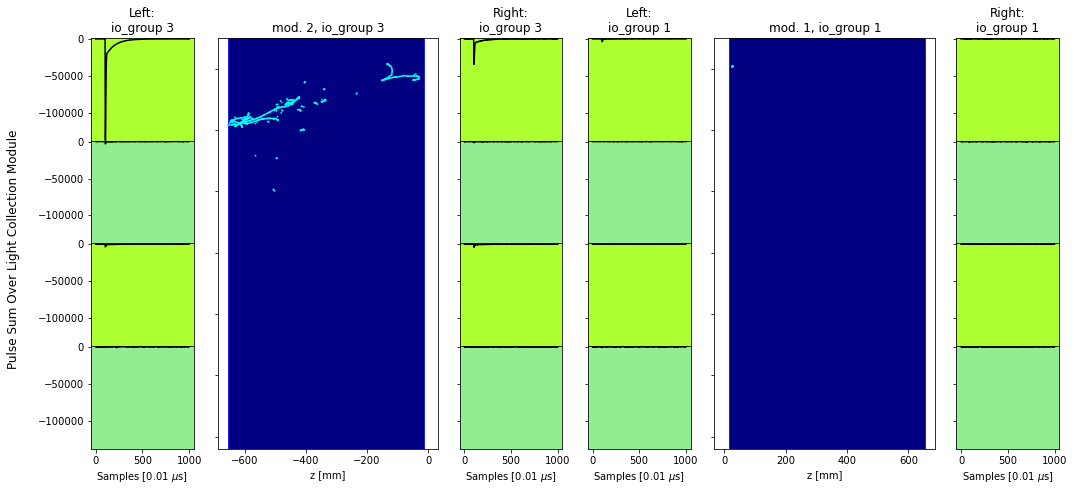

In [24]:
data_readout(3,1,SPILL)

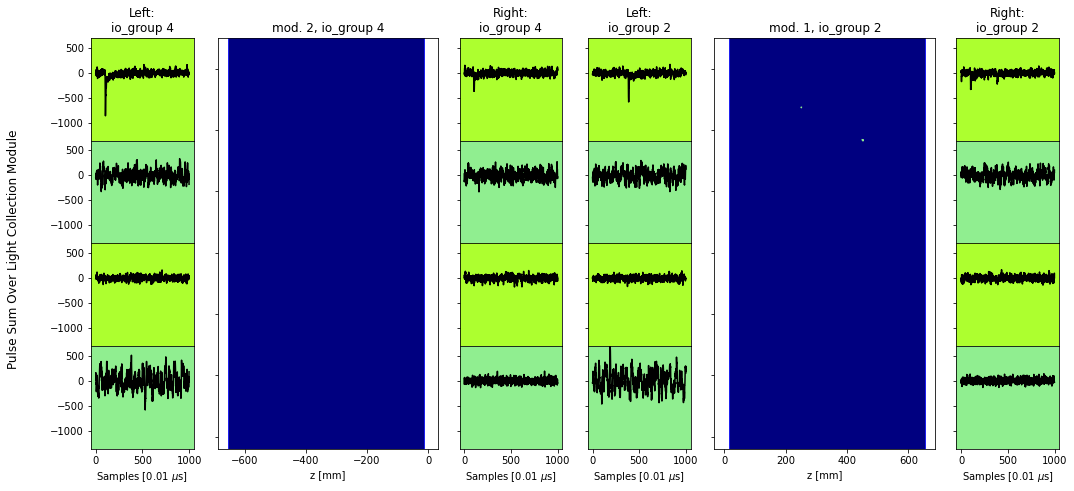

In [25]:
data_readout(4,2,SPILL)

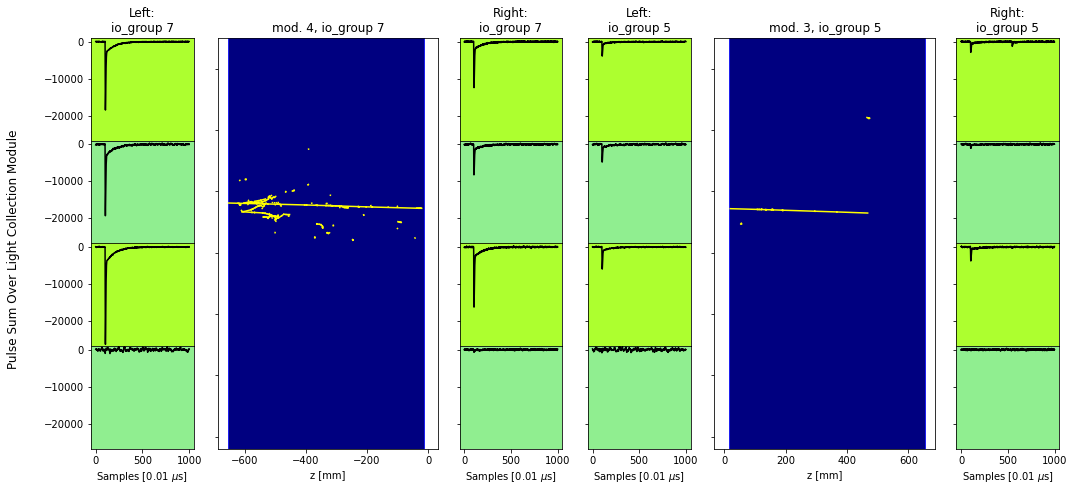

In [26]:
data_readout(7,5,SPILL)

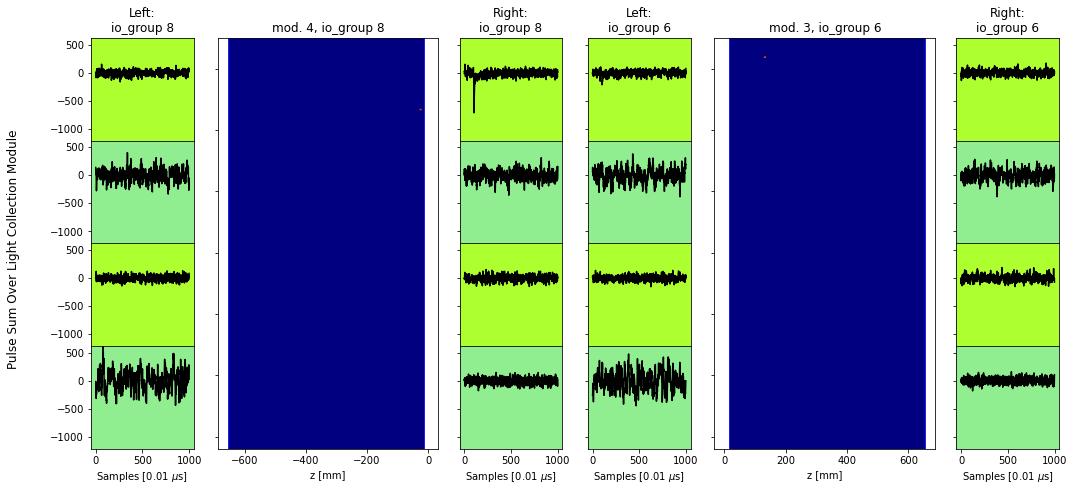

In [27]:
data_readout(8,6,SPILL)